# Egyszerű számítások Pythonban

A mérnöki gyakorlatban előforduló alapszámításokhoz 2 fő csomag importálása ajánlott:
- `sympy`: szimbolikus számításokhoz
- `numerikus`: numerikus számításokhoz (pl mátrix algebra)
A `module`-ok hívása az alábbi módokon történhet
- `import `*`modulename`* : importálja az adott `module`-t. Ekkor a `module`-ban lévő függvények hívása a `module.functionname(arguments)` segítségével történik (Az *1_Alapok.ipynb*-ben láthattunk erre példát a `math` `module` esetében).  
- `import `*`modulename`*`as `*`alias`* : hasonló az előzőhöz, de megválasztjuk, hogy milyen *alias*-ként hivatkozunk a `module`-unkra
-  `from `*`modulename`*` import `*`function1, function2, ...`* : csak bizonyos függvények importálása (nem szükséges a `module`-ra hivatkozni a függvények hívása során)
- `from `*`modulename`*` import *` : a `module` összes függvényének importálása (nem szükséges a `module`-ra hivatkozni a függvények hívása során)


# Sympy

In [2]:
import sympy as sp # sympy module importálása sp-ként

In [3]:
sp.sqrt(5.0) # tartalmazza a főbb függvényeket

2.23606797749979

In [4]:
sp.sqrt(5) # egész számra megtartja a pontos értéket (a lebegőpontos csak közelítés!)

sqrt(5)

In [5]:
sp.init_printing() # szép kimenet bekapcsolása

In [6]:
sp.sqrt(5)

In [7]:
sp.N(sp.sqrt(5))# pontos érték kiszámításának erőltetése

In [8]:
# ez a többi függvényre is igaz
print('sp.cos(sp.pi):')
display( sp.cos(sp.pi) )

print('sp.sin(sp.pi/2):')
display( sp.sin(sp.pi/2) )

print('sp.sin(sp.pi/6):')
display( sp.sin(sp.pi/6) )

print('sp.tan(sp.pi/4):')
display( sp.tan(sp.pi/4) )

print('sp.atan(1):')
display( sp.atan(1) )

print('π/4:')
display( sp.N(sp.pi/4) )
display( sp.N(sp.pi/4,3) ) # korlátozzuk a kiírandó tizedesjegyek számát


sp.cos(sp.pi):


sp.sin(sp.pi/2):


sp.sin(sp.pi/6):


sp.tan(sp.pi/4):


sp.atan(1):


π/4:


[**Sympy constants**](http://docs.sympy.org/0.7.6/modules/mpmath/functions/constants.html)

In [9]:
sp.N(sp.deg(1),4)# radiánból fok

In [10]:
sp.rad(10) # fokból radián

In [11]:
print("π:",sp.N(  sp.pi  ,6)) # pi
print("Euler szám:",sp.N(   sp.E   ,6)) # Euler szám

π: 3.14159
Euler szám: 2.71828


# Szimbolikus számítások

## Alapok

In [12]:
x,y = sp.symbols('x,y')

In [13]:
x # szimbólum 

In [14]:
y

In [15]:
x+y

In [16]:
x**y

In [17]:
# A függvények ugyanúgy működnek
def foo(x):
    return x**2-100*x+200

foo(x) #kimenet: expression

In [18]:
def gsp(x,y):
    return x**2 + sp.exp(10*y)

gsp(x, y)

## *Expression* manipuláció

In [19]:
sp.factor( x**2+2*x*y+y**2 )

In [20]:
sin2x=sp.simplify(2*sp.sin(x)*sp.cos(x))
sin2x

In [21]:
display(sp.expand(sin2x))
sin2x.expand()

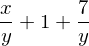

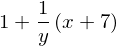

In [22]:
frac=x/y+y/y+7/y 
display( frac )
frac.ratsimp()

## Függvényanalízis

### Deriválás

In [23]:
sin2x.diff() # deriválás

In [24]:
sp.sin(2*x+2*y).diff(x)

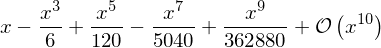

In [25]:
sp.series(sp.sin(x),x,0,10) # Taylor sorfejtés x szerint, x0=0 körül, 10-ed renben

### Integrálás

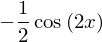

In [26]:
sp.integrate(sp.sin(2*x),x) # Határozatlan integrál

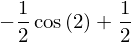

In [27]:
integ=sp.integrate(sp.sin(2*x),(x,0,1)) # Határozott integrál
display(integ) # Pontos formában megtartva
sp.N(integ,3)

# Vektor- és mátrixszámítások *sympy*-ban
Kisebb méretek esetén, amelyek akár szimbolikus számokat is tartalmaznak

In [28]:
v1= sp.Matrix([2.,3.,4.]) # oszlopvektor
v2= sp.Matrix([[3.,-2.,-7.]]) # sorvektor (még 1 szögletes zárójel)
mx1 = sp.Matrix([[1.,2.,3.],[2.,0.,4.],[3.,4.,1.]])
mx2 = sp.Matrix([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])
EM = sp.eye(3) # egységmátrix

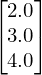

In [29]:
v1

In [30]:
v2

In [31]:
v2.multiply(v1)

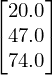

In [32]:
mx2.multiply(v1)

In [33]:
v2.multiply(mx2)

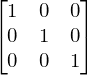

In [34]:
EM

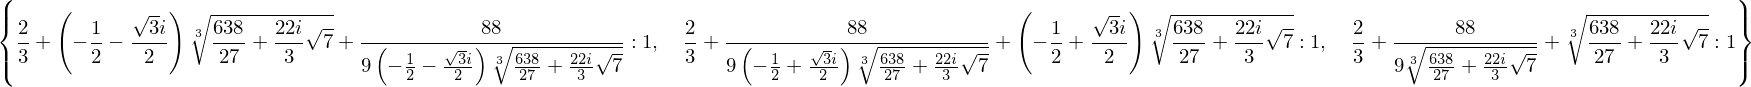

In [35]:
mx1.eigenvals() # sajátértékek és multiplicitásuk (racionális számokkal)

In [36]:
mx1.eigenvals(rational=False) # sajátértékek numerikusan

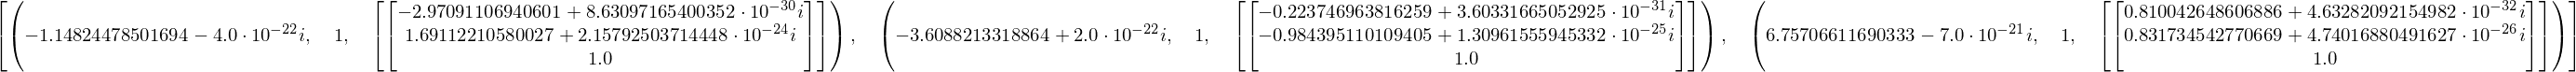

In [37]:
mx1.eigenvects() # sajátvektorok numerikusan

In [38]:
mx1.det() # mx1 determinánsa

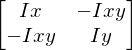


 Sajátértékek, vektorok: 



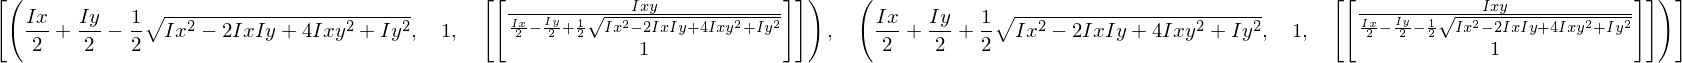

In [39]:
Ix,Iy,Ixy = sp.symbols('Ix,Iy,Ixy')
mxSP=sp.Matrix([[Ix,-Ixy],[-Ixy,Iy]])
display(mxSP)

print('\n Sajátértékek, vektorok: \n')
mxSP.eigenvects()

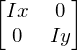


 Sajátértékek, vektorok: 



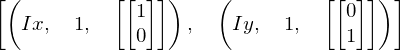

In [40]:
mxSP=sp.Matrix([[Ix,0],[0,Iy]])
display(mxSP)

print('\n Sajátértékek, vektorok: \n')
mxSP.eigenvects()

# Vektor- és mátrixszámítások *numpy*-ban
Nagy mátrixok és vektorok esetén érdemes ezt használni, vagy ha sok numerikus adattal dolgozik az ember. Továbbá a sajátérték-sajátvektor számítások is jobban megoldott ebben a csomagban

In [41]:
import numpy as np

In [42]:
v1= np.array([2.,3.,4.])
v2= np.array([3.,-2.,-7.])
mx1 = np.array([[1.,2.,3.],[2.,0.,4.],[3.,4.,1.]])
mx2 = np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])

In [43]:
print( np.dot(mx2,v1) )  # skalár szorat mx2*v1
print( np.dot(v1,mx2) )  # skalár szorat transpose(v1)*mx2
print( np.cross(v1,v2) ) # keresztszorzat v1×v2

[ 20.  47.  74.]
[ 42.  51.  60.]
[-13.  26. -13.]


In [44]:
(λ,V) = np.linalg.eig(mx1) # Mátrix sajátértékei, sajátvektorai a \lambda és a V változókban

# kiíratás 2 értékes tizedes jeggyel és for ciklusra példa
for (i,v) in enumerate(V):
    print(i+1, '. sajátérték és -vektor:',sep='')
    print('λ = ', sp.N(λ[i],3), '; v = ', [sp.N(e,3) for e in v], sep='', end='\n\n')

1. sajátérték és -vektor:
λ = 6.76; v = [0.529, 0.834, -0.157]

2. sajátérték és -vektor:
λ = -1.15; v = [0.543, -0.475, -0.693]

3. sajátérték és -vektor:
λ = -3.61; v = [0.653, -0.281, 0.704]



Figyeljük meg, hogy míg a sympy a sajátvektor utolsó koordinátáját 1-nek választja, addig a numpy a sajátvektorokat 1-re normálja!

# Egyenletek megoldása

## Egyszerű egyenletrendszerek *sympy*-vel

[Supported equation types:](https://docs.sympy.org/latest/modules/solvers/solvers.html)
 - polynomial,
 - transcendental
 - piecewise combinations of the above
 - systems of linear and polynomial equations
 - systems containing relational expressions.

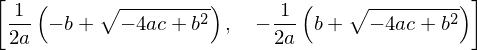

In [45]:
a,b,c,x = sp.symbols('a,b,c,x')
sp.solve(a*x**2 + b*x + c,x)

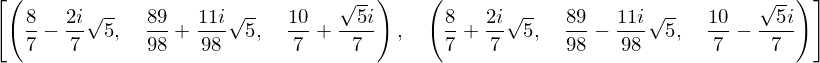

In [46]:
# Több változó, több ismeretlen
x,y,z = sp.symbols('x,y,z')
e1 = 3*z + 2*y + 1*x**2 - 7
e2 = 4*z + 0*y**2 + 2*x - 8
e3 = 1*z**2 + 4*y + 3*x - 9

sp.solve([e1,e2,e3],[x,y,z])

In [47]:
sp.solve(-sp.exp(x)+3+sp.sin(x),x)

NotImplementedError: multiple generators [exp(x), sin(x)]
No algorithms are implemented to solve equation -exp(x) + sin(x) + 3

## Általános egyenletek megoldása numerikusan *scipy.optimize*-al

In [ ]:
import scipy.optimize as eqsolver

In [ ]:
def f(x):
    return -sp.exp(x)+3+sp.sin(x)

gyok = eqsolver.newton(f,1.0) # newton módszer 1-ből indulva (de léteznek más módszerek is)
gyok

A *scipy.optimize* rengeteg megoldót tartalmaz. Ezek listáját az `eqsolver.` beírásával, majd a tab lenyomásával hívhatjuk elő.

## Lineáris egyenletrendszerek megoldása *numpy*-val (hatékonyabb mint a scipy)

In [ ]:
import numpy as np

#összehasonlítás sympy-vel
e1 = 3*z + 2*y + 1*x - 7
e2 = 4*z + 0*y + 2*x - 8
e3 = 1*z + 4*y + 3*x - 9

# Mátrixos alak (A.x=b)
A = np.array([[3,2,1],[4,0,2],[1,4,3]])
b = np.array([7,8,9])


npMO = np.linalg.solve(A,b) # Megoldás az numpy lineár ER megoldójával
spMO = sp.solve([e1,e2,e3],[x,y,z]) # Megoldás az sympy általános ER megoldójával

In [ ]:
print('numpy:\n',npMO)
print('\nsympy:')
display(spMO)
print(' [',end='',sep='')
for v in [z,y,x]:
    print(sp.N(spMO[v],9),end=' ')
print(']')